In [16]:
import matplotlib.pyplot as plt
import centralities
import graph_handling
import warnings

warnings.filterwarnings('ignore')

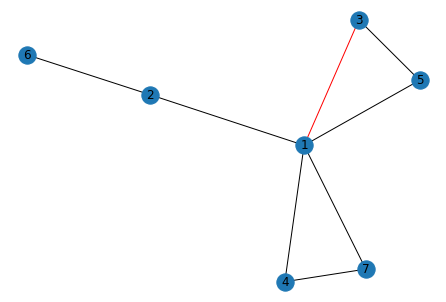

In [17]:
new_edge=(1, 3)
k, head, tail = 5, 1, 3
graph, new_graph = graph_handling.create(new_edge[0], new_edge[1])
graph_handling.show(graph, new_edge[0], new_edge[1])

This is the graph. the red edge is the one we are adding.

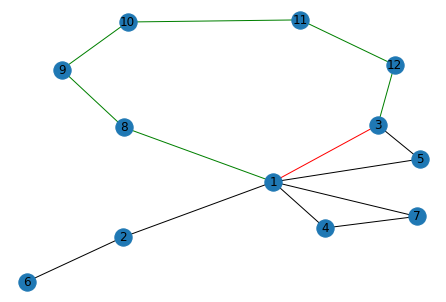

In [18]:
path = graph_handling.k_path(new_graph, k, head, tail)
k_path_edges = list(set(path.edges) - set(new_graph.edges))

graph_handling.show(path, new_edge[0], new_edge[1], k_path_edges)

This is the "k_path graph". We choose a "head" and a "tail" and we create a path of length k from the first to the second and add it to the graph.


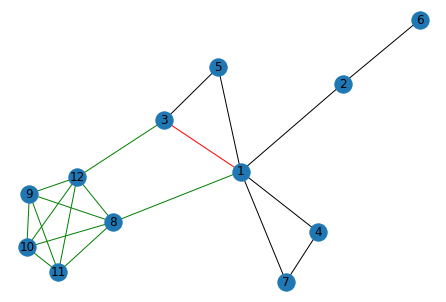

In [19]:
clique = graph_handling.k_clique(new_graph, k, head, tail)
k_clique_edges = list(set(clique.edges) - set(new_graph.edges))

graph_handling.show(clique, new_edge[0], new_edge[1], k_clique_edges)

This is the "k_clique graph". We choose a "head" and a "tail" and we create a clique of dimension k from the first to the second and add it to the graph.

In [48]:
# computing scores for old and new k_path and k_clique graph
k_path_score, k_clique_score = centralities.eigenvector_at_k(graph, k, head, tail, False)
new_k_path_score, new_k_clique_score = centralities.eigenvector_at_k(new_graph, k, head, tail, False)

for k,v in k_path_score.items():
    print('k:' + str(k) + ' -> ' + str(v))

k:0 -> {1: 0.26121, 2: 0.1306, 3: 0.0541, 4: 0.1847, 5: 0.1306, 6: 0.0541, 7: 0.1847}
k:1 -> {1: 0.23675, 2: 0.10305, 3: 0.09216, 4: 0.14162, 5: 0.12311, 6: 0.03857, 7: 0.14162, 8: 0.12311}
k:2 -> {1: 0.22684, 2: 0.10019, 3: 0.0679, 4: 0.1381, 5: 0.11153, 6: 0.03791, 7: 0.1381, 8: 0.11153, 9: 0.0679}
k:3 -> {1: 0.22202, 2: 0.09876, 3: 0.0568, 4: 0.13634, 5: 0.10608, 6: 0.03757, 7: 0.13634, 8: 0.10608, 9: 0.0568, 10: 0.04322}
k:4 -> {1: 0.21971, 2: 0.09807, 3: 0.05161, 4: 0.13548, 5: 0.10349, 6: 0.03741, 7: 0.13548, 8: 0.10349, 9: 0.05161, 10: 0.03183, 11: 0.03183}
k:5 -> {1: 0.2186, 2: 0.09774, 3: 0.04918, 4: 0.13507, 5: 0.10227, 6: 0.03733, 7: 0.13507, 8: 0.10227, 9: 0.04918, 10: 0.02652, 11: 0.02025, 12: 0.02652}


We obtain for every value of k the scores of each node of the k_path graph, according to k.

In [29]:
# path
first_node_scores_path = [k_path_score[k][new_edge[0]] for k in k_path_score.keys()]
second_node_scores_path = [k_path_score[k][new_edge[1]] for k in k_path_score.keys()]

new_first_node_scores_path = [new_k_path_score[k][new_edge[0]] for k in new_k_path_score.keys()]
new_second_node_scores_path = [new_k_path_score[k][new_edge[1]] for k in new_k_path_score.keys()]

first_node_diff_path = [x - y for x, y in zip(new_first_node_scores_path, first_node_scores_path)]
second_node_diff_path = [x - y for x, y in zip(new_second_node_scores_path, second_node_scores_path)]

# clique
first_node_scores_clique = [k_clique_score[k][new_edge[0]] for k in k_clique_score.keys()]
second_node_scores_clique = [k_clique_score[k][new_edge[1]] for k in k_clique_score.keys()]

new_first_node_scores_clique = [new_k_clique_score[k][new_edge[0]] for k in new_k_clique_score.keys()]
new_second_node_scores_clique = [new_k_clique_score[k][new_edge[1]] for k in new_k_clique_score.keys()]

first_node_diff_clique = [x - y for x, y in zip(new_first_node_scores_clique, first_node_scores_clique)]
second_node_diff_clique = [x - y for x, y in zip(new_second_node_scores_clique, second_node_scores_clique)]

In [56]:
print(first_node_scores_path)
print(new_first_node_scores_path)

[0.26121, 0.23675, 0.22684, 0.22202, 0.21971, 0.2186]
[0.25728, 0.23797, 0.22267, 0.21632, 0.21372, 0.21268]


These are the scores of the first node before and after adding the edge for increasing values of k in the k_path graph.

In [54]:
print(second_node_scores_path)
print(new_second_node_scores_path)

[0.0541, 0.09216, 0.0679, 0.0568, 0.05161, 0.04918]
[0.14854, 0.16098, 0.14129, 0.13333, 0.13011, 0.12882]


These are the scores of the second node before and after adding the edge for increasing values of k in the k_path graph.

In [57]:
print([round(x, 6) for x in first_node_diff_path])
print([round(x, 6) for x in second_node_diff_path])

[-0.00393, 0.00122, -0.00417, -0.0057, -0.00599, -0.00592]
[0.09444, 0.06882, 0.07339, 0.07653, 0.0785, 0.07964]


These are differences between the first and the second node, respectively, for increasing values of k in the k_path graph.

In [59]:
print('Scores of node ' + str(new_edge[0]) + ' before and after adding the edge for increasing values of k:')
print(first_node_scores_clique)
print(new_first_node_scores_clique)
print('\n')
print('Scores of node ' + str(new_edge[1]) + ' before and after adding the edge for increasing values of k:')
print(second_node_scores_clique)
print(new_second_node_scores_clique)
print('\n')
print('Differences in node ' + str(new_edge[0]) + ' and ' +  str(new_edge[1]) + ' for increasing values of k')
print([round(x, 6) for x in first_node_diff_clique])
print([round(x, 6) for x in second_node_diff_clique])

Scores of node 1 before and after adding the edge for increasing values of k:
[0.26121, 0.23675, 0.22684, 0.18653, 0.10928, 0.06036]
[0.25728, 0.23797, 0.22267, 0.1955, 0.13715, 0.0779]


Scores of node 3 before and after adding the edge for increasing values of k:
[0.0541, 0.09216, 0.0679, 0.07221, 0.06571, 0.04663]
[0.14854, 0.16098, 0.14129, 0.12946, 0.10042, 0.06418]


Differences in node 1 and 3 for increasing values of k
[-0.00393, 0.00122, -0.00417, 0.00897, 0.02787, 0.01754]
[0.09444, 0.06882, 0.07339, 0.05725, 0.03471, 0.01755]


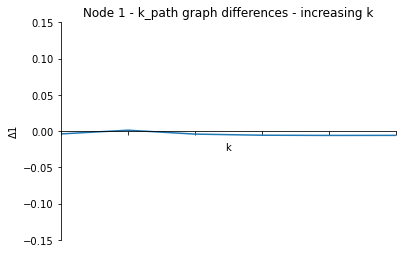

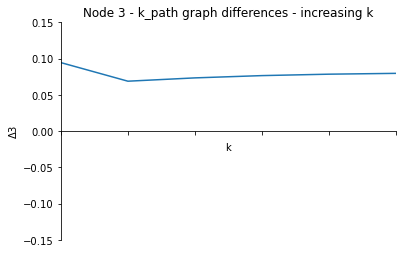

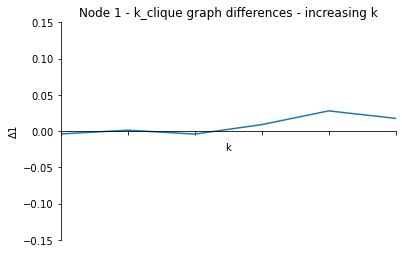

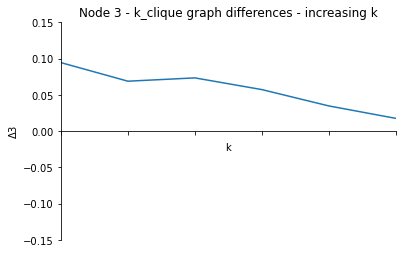

In [60]:
graph_handling.show_diff(first_node_diff_path, 'Node ' + str(new_edge[0]) + ' - k_path graph differences - increasing k', new_edge[0])
graph_handling.show_diff(second_node_diff_path, 'Node ' + str(new_edge[1]) + ' - k_path graph differences - increasing k', new_edge[1])
graph_handling.show_diff(first_node_diff_clique, 'Node ' + str(new_edge[0]) + ' - k_clique graph differences - increasing k', new_edge[0])
graph_handling.show_diff(second_node_diff_clique, 'Node ' + str(new_edge[1]) + ' - k_clique graph differences - increasing k', new_edge[1])

These plots show how the difference of the scores of the two nodes change before and after adding the edge for increasing value of k in the k_path and k_clique graphs